<a href="https://colab.research.google.com/github/girotodenis/ReconhecimentoImagemVisaoComputacional/blob/master/Atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOME COMPLETO DOS INTEGRANTES DO GRUPO:
**Davi Miranda Gonçalves**, 
**Denis SIlva Giroto**,
**Naiara Moura Pires**

MATRÍCULAS DOS INTEGRANTES DO GRUPO:
**1931143030**,
**1931143029**,
**1931143033**


In [1]:
# Clone the entire repo.
!git clone -l -s https://github.com/girotodenis/ReconhecimentoImagemVisaoComputacional.git cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 118 (delta 56), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (118/118), 17.78 MiB | 5.75 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [2]:
%cd cloned-repo
!ls

/content/cloned-repo
Atividade1.ipynb  Atividade2.ipynb  imagens  README.md


In [3]:
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np

In [4]:
execution_path = os.getcwd()
print(execution_path)

/content/cloned-repo


#Atividade 1



##Exercício 1

Escreva um programa em que o limiar seja estimado
automaticamente usando a técnica de Global Thresholding. A saída
deve ser uma imagem binarizada e a entrada de ser a imagem
fingerPrint.png. Qual a relação que existe entre o limiar e o número
de iterações?

In [5]:
def estimar_limiar(imagem):
  hist = cv2.calcHist([imagem],[0],None,[256],[0,256])
  hist_norm = hist.ravel()/hist.max()

  plt.hist(hist_norm, bins=256)
  plt.show()

  Q = hist_norm.cumsum()
  bins = np.arange(256)
  fn_min = np.inf
  limiar = -1
  for i in range(1,256):
      p1,p2 = np.hsplit(hist_norm,[i]) 
      q1,q2 = Q[i],Q[255]-Q[i] 
      b1,b2 = np.hsplit(bins,[i])
      m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
      v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
      fn = v1*q1 + v2*q2
      if fn < fn_min:
          fn_min = fn
          limiar = i
  return limiar

def global_thresholding(imagem):
  limiar = estimar_limiar(imagem)
  print('limiar',limiar)
  limiar, imgLimiar = cv2.threshold(imagem, limiar, 256,cv2.THRESH_BINARY)
  print('limiar',limiar)
  return imgLimiar




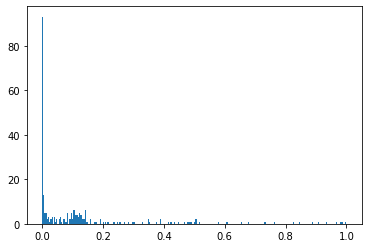

limiar 126
limiar 126.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


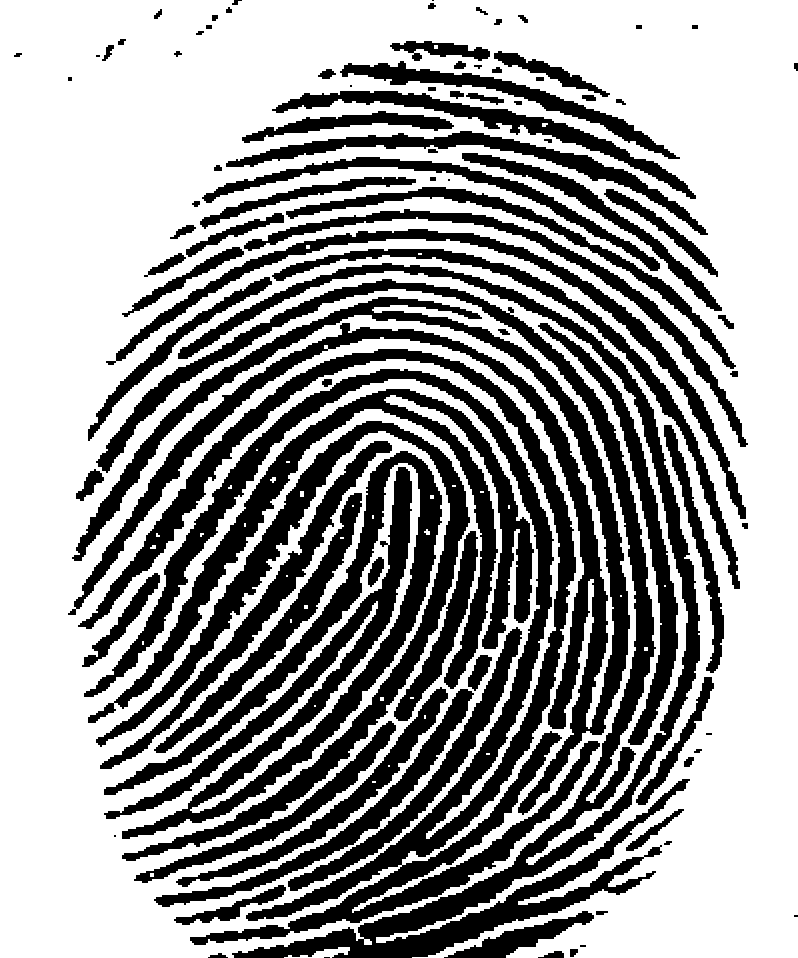

In [6]:
imagem = cv2.imread('./imagens/fingerPrint.png',0) 
#imagem = cv2.GaussianBlur(imagem, (5, 5), 0) 
imgLimiar = global_thresholding( imagem ) 
cv2_imshow( imgLimiar )

####R. 
Quanto mais interações mais o EM(Expectation-Maximization) vai convergir. Melhora a precisão de encontrar o melhor linear.

##Exercício 2
A imagem abaixo possui círculos e quadrados de vários tamanhos.
Alguns objetos possuem um ou dois buracos dentro deles. Faça um
algoritmo que use operações morfológicas e lógicas para responder
as perguntas abaixo.

In [8]:
imagem = cv2.imread('./imagens/blocks.png') 
print('Largura em pixels: ', end='')
print(imagem.shape[1]) #largura da imagem
print('Altura em pixels: ', end='')
print(imagem.shape[0]) #altura da imagem
print('Qtde de canais: ', end='')
print(imagem.shape[2]) 

Largura em pixels: 384
Altura em pixels: 331
Qtde de canais: 3


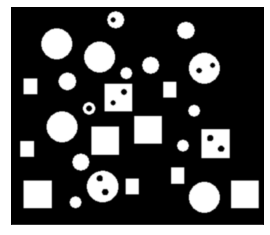

In [9]:
plt.imshow(imagem, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [12]:
# binarizar
img = cv2.imread('./imagens/blocks.png', 0)
m, n = img.shape
ret,imagembi = cv2.threshold(img,127,255,cv2.THRESH_BINARY)


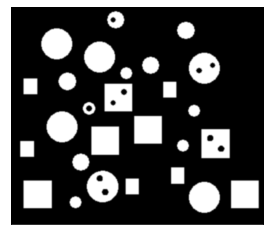

In [13]:
plt.imshow(imagembi, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

###a)

Que fração dos pixels da imagem são brancos? Quantos objetos a
imagem possui?

In [14]:
pixelBranco = cv2.countNonZero(imagembi)
TotalNumberOfPixels = m * n
fracaoPixels = pixelBranco / TotalNumberOfPixels

print("Total de pixel: ", TotalNumberOfPixels)
print("Total de pixel Brancos: ", pixelBranco)
print("Franção dos pixels: ", fracaoPixels)

Total de pixel:  127104
Total de pixel Brancos:  27011
Franção dos pixels:  0.2125110146022155


In [15]:
contours, hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [16]:
max_num = np.amax(hierarchy) + 1
numerosComMaisDeUmBuraco = 0
numerosComUmBuraco = 0
totalDeBuracos = 0
ObjetosComBuracos = 0
for c, h in zip(contours, hierarchy[0]):
    if h[2] != -1:
        ObjetosComBuracos = ObjetosComBuracos + 1
        if h[0] == -1:
            num_interior_contours = max_num - h[2]
        else: num_interior_contours = h[0]-h[2]
    else: num_interior_contours = 0
    totalDeBuracos = totalDeBuracos + num_interior_contours
    # Quantidades de buraco
    if num_interior_contours == 1:
      numerosComUmBuraco = numerosComUmBuraco + 1
    if num_interior_contours > 1:
      numerosComMaisDeUmBuraco = numerosComMaisDeUmBuraco + 1

numeroTotalDeObjetos = max_num - totalDeBuracos 
print("Numero de Objetos: ", numeroTotalDeObjetos)

Numero de Objetos:  27


####R. 27


###b)

Quantos buracos há na imagem? Quantos objetos têm mais de um
buraco?

In [17]:
print("Total de buracos: ", totalDeBuracos)
print("Com mais de um buraco: ", numerosComMaisDeUmBuraco)

Total de buracos:  10
Com mais de um buraco:  4


####R. Total de buracos:  10 e com mais de um buraco:  4

###c)

Quantos quadrados e círculos a imagem possui?

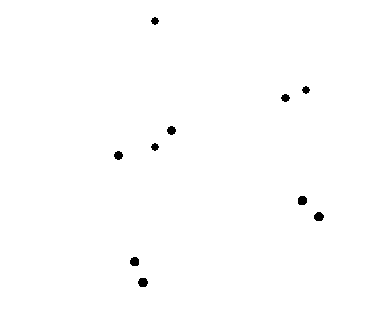

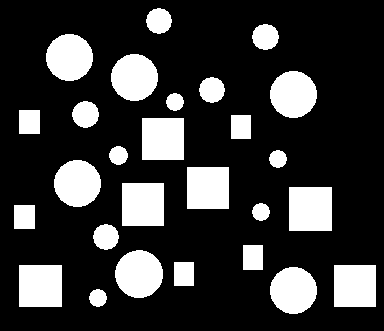

In [20]:
im_floodfill = imagembi.copy()

h, w = imagembi.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
cv2_imshow(im_floodfill)


im_floodfill_inv = cv2.bitwise_not(im_floodfill)
im_out = imagembi | im_floodfill_inv
cv2_imshow(im_out)

contours2, hierarchy = cv2.findContours(im_out,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [21]:
# *********************************
# verifique o número de elementos nos contornos aproximados de todas as formas. 
# o quadrado terá 4, 
# Os círculos terão mais.
# *********************************
quadrado = 0
circulo = 0 
for cnt in contours2: 
  approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True) 
  # print("---> ",approx) 
  if len(approx)==4: 
     quadrado = quadrado + 1 
  elif len(approx) > 10: 
      circulo = circulo + 1
print("Quadrado : ",quadrado) 
print("circulo : ",circulo) 

Quadrado :  11
circulo :  16


####R.  Quadrado : 11 Circulo : 16

###d)
Identifique os quadrados que possuem buracos e os círculos que
não possuem buracos?

In [22]:
img_color = cv2.imread('./imagens/blocks.png')
contours, hierarchy = cv2.findContours(imagembi,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

Mascara 


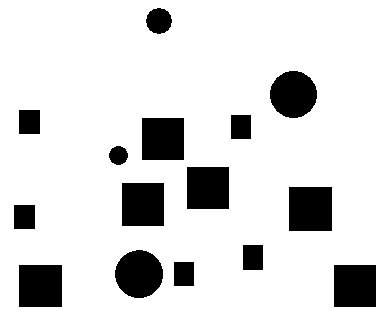

 --  Círculos que não possuem buracos -- 


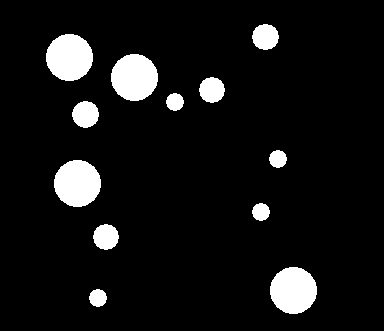

 --  Quadrados que possuem buracos -- 


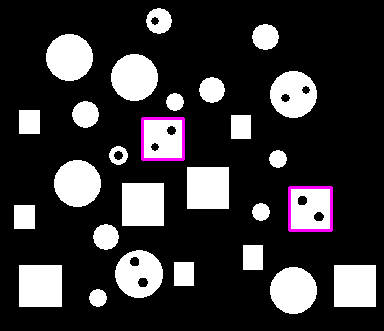

In [23]:
max_num = np.amax(hierarchy) +1

imagem_final = img_color.copy()
gray = cv2.cvtColor(imagem_final, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 50, 100)

contours2, hierarchy = cv2.findContours(imagembi,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
mask = np.ones(imagem_final.shape[:2], dtype="uint8") * 255

for c, h in zip(contours, hierarchy[0]):
    approx = cv2.approxPolyDP(c,0.01*cv2.arcLength(c,True),True)
    if h[2] != -1:
      cv2.drawContours(mask, [c], -1, 0, -1)
      if h[0] == -1:
            num_interior_contours = max_num - h[2]
      else: num_interior_contours = h[0]-h[2]
    else: num_interior_contours = 0
    if len(approx)==4 and num_interior_contours > 0:
     cv2.drawContours(img_color, [c], -1, (255,0,255), 2)
    if len(approx)==4: 
     cv2.drawContours(mask, [c], -1, 0, -1)

image = cv2.bitwise_and(imagem_final, imagem_final, mask=mask)

print("Mascara ")
cv2_imshow(mask)

print(" --  Círculos que não possuem buracos -- ")
cv2_imshow(image)

print(" --  Quadrados que possuem buracos -- ")
cv2_imshow(img_color)
